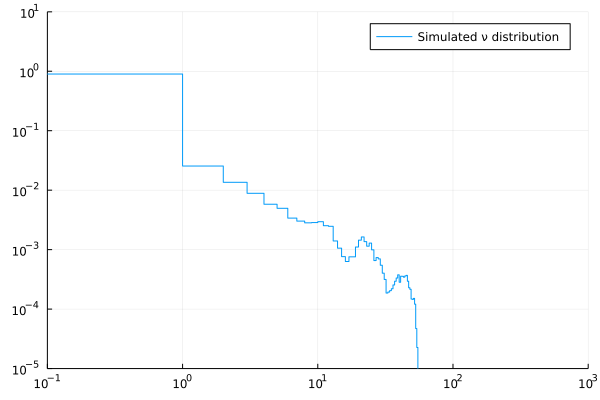

In [9]:
using Plots

# パラメータの定義
ν_0 = 0.01  # 背景強度
τ_1, τ_2 = 1.0, 3.0  # 時間減衰
n_1, n_2 = 0.5, 0.49  # 分岐比
dt = 0.001 # サンプリング時間間隔
T = 10000  # サンプリング時間

# 強度ν(t)の計算関数
function calculate_ν(t, events, ν_0, τ_1, τ_2, n_1, n_2)
    ν_t = ν_0 + n_1 * sum((1/τ_1) * exp.(-(t .- events[events .<= t]) / τ_1)) + n_2 * sum((1/τ_2) * exp.(-(t .- events[events .<= t]) / τ_2))
    return ν_t
end

# νのヒストグラムをプロットする関数
function plot_intensity_distribution(ν_0, τ_1, τ_2, n_1, n_2, T, dt)
    events = Float64[]
    t = 0.0
    while t <= T
        ν_t = calculate_ν(t, events, ν_0, τ_1, τ_2, n_1, n_2)
        if rand() < ν_t*dt
            push!(events, t)
        end
        t += dt
    end
    
    intensities = [calculate_ν(t, events, ν_0, τ_1, τ_2, n_1, n_2) for t in 0:dt:T]
    histogram(intensities, normed=true, label="Simulated ν distribution", bins=100, xscale=:log10, yscale=:log10, xlims=(10^-1, 10^3), ylims=(10^-5, 10^1))
end

# グラフをプロット
plot_intensity_distribution(ν_0, τ_1, τ_2, n_1, n_2, T, dt)
